In [2]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]

cooling_schedule_data = {}
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule.json', 'r') as file:
        data = json.load(file)
        cooling_schedule_data[cooling_schedule] = data

In [3]:
import numpy as np
import pandas as pd

mean_initial_solutions = []
mean_best_solutions = []
mean_times = []
parameters_kinds = []
cooling_schedule_kinds = []

for cooling_schedule in cooling_schedules:
    for parameters, results in cooling_schedule_data[cooling_schedule].items():
        mean_initial = sum([result['initial_cost'] for result in results])/len(results)
        mean_best = sum([result['best_cost'] for result in results])/len(results)
        mean_time = sum([result['elapsed_time'] for result in results])/len(results)
        mean_best_solutions.append(mean_best)
        mean_times.append(mean_time)
        parameters_kinds.append(str(parameters))
        cooling_schedule_kinds.append(cooling_schedule)
        mean_initial_solutions.append(mean_initial)

columns = ['parameters', 'cooling_schedule', 'initial_cost', 'best_cost', 'elapsed_time']
df = pd.DataFrame(np.array([parameters_kinds, cooling_schedule_kinds,mean_initial_solutions, mean_best_solutions, mean_times]).T, columns=columns)

df['initial_cost'] = df['initial_cost'].astype('float')
df['best_cost'] = df['best_cost'].astype('float')
df['elapsed_time'] = df['elapsed_time'].astype('float')
df['cost_diff'] = df['initial_cost'] - df['best_cost']

df.head()

,parameters,cooling_schedule,initial_cost,best_cost,elapsed_time,cost_diff
0,"(20, 5, 1, 0.95)",cauchy,2355.30,2354.68,0.307466,0.62
1,"(20, 5, 1, 0.995)",cauchy,2239.26,2236.38,0.202254,2.88
2,"(20, 5, 1, 0.999)",cauchy,2327.84,2327.84,0.190900,0.00
3,"(20, 5, 3, 0.95)",cauchy,2201.30,2196.32,0.303290,4.98
4,"(20, 5, 3, 0.995)",cauchy,2200.60,2196.58,0.221917,4.02


In [4]:
means_by_cooling_schedule = df.groupby('cooling_schedule').mean()
means_by_cooling_schedule.head()

,initial_cost,best_cost,elapsed_time,cost_diff
cooling_schedule,,,,
cauchy,2256.18,2252.122778,0.273699,4.057222


<AxesSubplot:xlabel='cooling_schedule'>

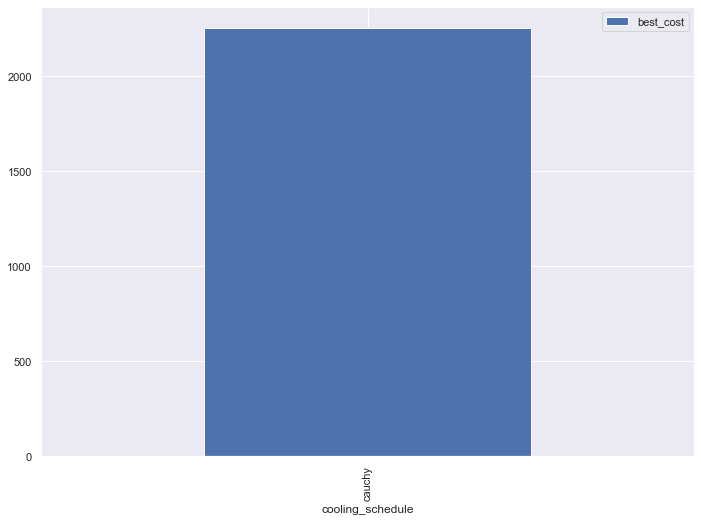

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
means_by_cooling_schedule.plot(y='best_cost', kind='bar')

<AxesSubplot:xlabel='cooling_schedule'>

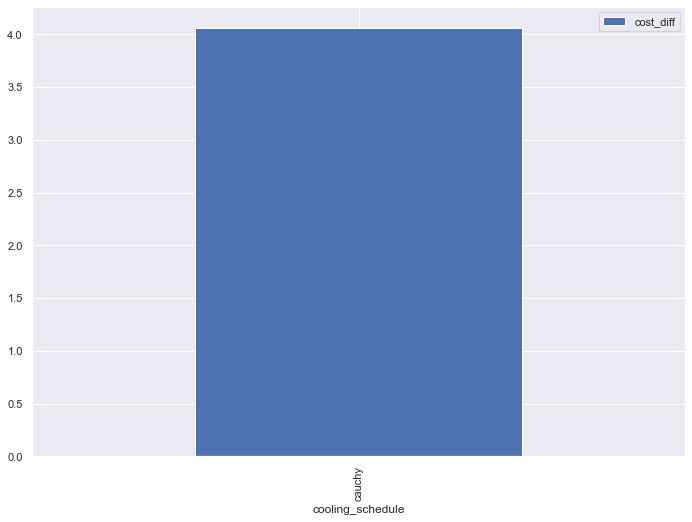

In [6]:
means_by_cooling_schedule.plot(y='cost_diff', kind='bar')

<AxesSubplot:xlabel='cooling_schedule'>

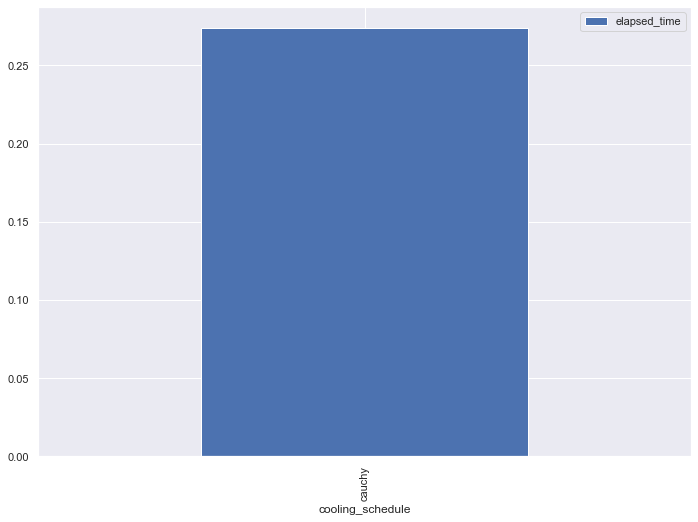

In [7]:
means_by_cooling_schedule.plot(y='elapsed_time', kind='bar')

In [8]:
df.sort_values('elapsed_time', ascending=False)

,parameters,cooling_schedule,initial_cost,best_cost,elapsed_time,cost_diff
26,"(80, 15, 5, 0.999)",cauchy,2270.70,2270.70,0.414294,0.00
35,"(100, 20, 5, 0.999)",cauchy,2172.82,2169.22,0.403106,3.60
30,"(100, 20, 3, 0.95)",cauchy,2200.98,2200.46,0.378698,0.52
5,"(20, 5, 3, 0.999)",cauchy,2237.04,2235.28,0.335433,1.76
13,"(50, 10, 3, 0.995)",cauchy,2252.12,2249.34,0.322273,2.78
10,"(50, 10, 1, 0.995)",cauchy,2265.78,2255.48,0.319303,10.30
14,"(50, 10, 3, 0.999)",cauchy,2328.60,2321.76,0.315398,6.84
27,"(100, 20, 1, 0.95)",cauchy,2276.40,2275.32,0.313609,1.08
0,"(20, 5, 1, 0.95)",cauchy,2355.30,2354.68,0.307466,0.62
29,"(100, 20, 1, 0.999)",cauchy,2202.54,2198.94,0.306066,3.60
